In [90]:
# Import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-deep")

In [67]:
# Get covid-19 data
from google.colab import files
uploaded = files.upload()

Saving Madedata1.csv to Madedata1 (1).csv


In [68]:
# Creating dataframe for data
covid_df = pd.read_csv("Madedata1.csv")
covid_df

,Country,Age,Gender,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Severity,Contact_with_covid_patient,Infected
0,China,10,Male,102,1,0,0,0,1,Mild,No,0
1,Italy,20,Male,103,1,1,0,0,0,Moderate,Not known,1
2,Iran,55,Transgender,99,0,0,0,1,1,Severe,No,0
3,Republic of Korean,37,Female,100,0,1,1,0,0,Mild,Yes,1
4,France,45,Male,101,1,1,1,1,0,Moderate,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,Myanmar,73,Male,98,0,1,0,0,0,Mild,No,0
2495,Cambodia,35,Female,104,1,0,1,0,0,Mild,Not known,1
2496,Finland,18,Female,99,1,0,0,1,1,Mild,Yes,1
2497,Morocco,39,Female,100,1,0,1,0,0,Mild,Not known,1


In [69]:
# Removing country column b/c we only need patient symptoms, age, and gender
covid_df.drop("Country", axis=1, inplace = True)
covid_df

,Age,Gender,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Severity,Contact_with_covid_patient,Infected
0,10,Male,102,1,0,0,0,1,Mild,No,0
1,20,Male,103,1,1,0,0,0,Moderate,Not known,1
2,55,Transgender,99,0,0,0,1,1,Severe,No,0
3,37,Female,100,0,1,1,0,0,Mild,Yes,1
4,45,Male,101,1,1,1,1,0,Moderate,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...
2494,73,Male,98,0,1,0,0,0,Mild,No,0
2495,35,Female,104,1,0,1,0,0,Mild,Not known,1
2496,18,Female,99,1,0,0,1,1,Mild,Yes,1
2497,39,Female,100,1,0,1,0,0,Mild,Not known,1


In [71]:
# Encoding data
label_encoder = LabelEncoder()
covid_df.iloc[:,1] = label_encoder.fit_transform(covid_df.iloc[:,1].values)
covid_df.iloc[:,8] = label_encoder.fit_transform(covid_df.iloc[:,8].values)
covid_df.iloc[:,9] = label_encoder.fit_transform(covid_df.iloc[:,9].values)
covid_df

,Age,Gender,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Severity,Contact_with_covid_patient,Infected
0,10,1,102,1,0,0,0,1,0,0,0
1,20,1,103,1,1,0,0,0,1,1,1
2,55,2,99,0,0,0,1,1,2,0,0
3,37,0,100,0,1,1,0,0,0,2,1
4,45,1,101,1,1,1,1,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
2494,73,1,98,0,1,0,0,0,0,0,0
2495,35,0,104,1,0,1,0,0,0,1,1
2496,18,0,99,1,0,0,1,1,0,2,1
2497,39,0,100,1,0,1,0,0,0,1,1


In [83]:
# Creating arrays and splitting data into train and test
X = covid_df.drop(["Infected"], axis=1).values
y = covid_df["Infected"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, stratify = y)
X_train.shape

(1749, 10)

In [84]:
# Creating nearest neighbor model and fitting train data
# Setting n_neighbors to 6 as default
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [85]:
# predicting data and returning accuracy
prediction = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print(accuracy)

0.936


In [88]:
# Testing different n_neighbor values to see which is the most effective
neighbor_values = np.arange(1,30)
train_accuracy = np.empty(len(neighbor_values))
test_accuracy = np.empty(len(neighbor_values))

i = 0
while i< len(neighbor_values):
  knn = KNeighborsClassifier(n_neighbors = i+1)
  knn.fit(X_train, y_train)
  train_accuracy[i] = knn.score(X_train, y_train)
  test_accuracy[i] = knn.score(X_test, y_test)
  i+=1

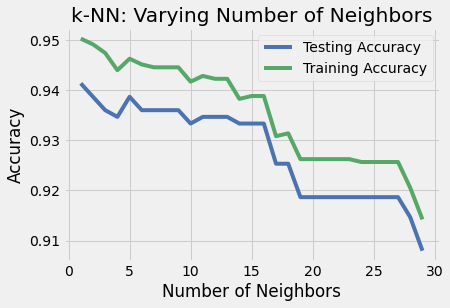

In [91]:
# Plotting relationship between accuracy and n_neighbor values
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbor_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbor_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()